In [39]:
import pandas as pd
import numpy as np
import matplotlib
import scipy.stats
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ab_browser_test.csv')
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [3]:
exp = df[df['slot'] == 'exp']
control = df[df['slot'] == 'control']

In [4]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [12]:
exp_median_scores = np.array(list(map(np.median, get_bootstrap_samples(exp['n_clicks'].values, 1000))))
control_median_scores = np.array(list(map(np.median, get_bootstrap_samples(control['n_clicks'].values, 1000))))
stat_intervals(exp_median_scores - control_median_scores, 0.05)

array([1., 1.])

In [13]:
exp_mean_scores = np.array(list(map(np.mean, get_bootstrap_samples(exp['n_clicks'].values, 1000))))
control_mean_scores = np.array(list(map(np.mean, get_bootstrap_samples(control['n_clicks'].values, 1000))))
stat_intervals(exp_mean_scores - control_mean_scores, 0.05)

array([0.20114074, 0.4135962 ])

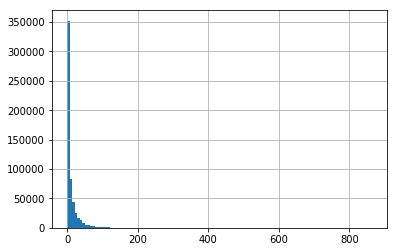

In [18]:
df['n_clicks'].hist(bins=120)

In [19]:
np.random.seed(0)
n_boot_samples = 500
sam = get_bootstrap_samples(exp['n_clicks'].values, n_boot_samples)

In [32]:
means = np.mean(sam, axis = 1)


In [33]:
control_boot_chi_squared = [np.sum((sam[i][:]-means[i])**2) for i in range(len(means))]

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

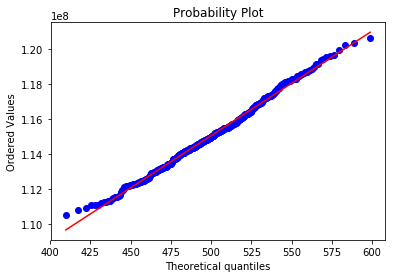

In [40]:
scipy.stats.probplot(control_boot_chi_squared, dist="chi2", 
                     sparams=(len(means)-1), plot=plt)

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

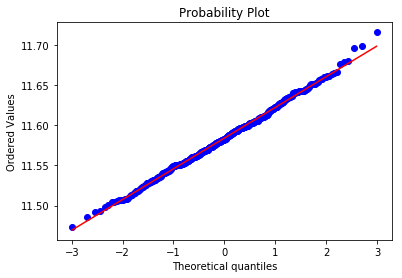

In [41]:
scipy.stats.probplot(means, plot=plt)

In [43]:
n1 = exp.groupby('userID').sum()['n_clicks']
n2 = control.groupby('userID').sum()['n_clicks']
scipy.stats.mannwhitneyu(n1, n2)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)